# EDA: Valorant Leaderboard Analysis (Episode 4, Act 3)

In [46]:
#import pandas and other important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [47]:
#read in all input data
try:
    df = pd.read_csv('val_stats.csv')
except:
    df = pd.read_csv('/datasets/val_stats.csv')
    
#looking at data, checking info to see what needs to be changed
df.info()
#df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85675 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

### Conclusion

There are some different types, such as headshots, first_bloods, kills, deaths, assists, gun1_kills, and gun2_kills, being an object, rather than a float or int 

## Data Preprocessing
* Importing the data
* Changing tdatatypes in general
* Checking for duplicates and missing values and taking action if necessary

In [48]:
#2 Data preprocessing

# Listing missing values
print('\nNumber of missing values found: \n',df.isna().sum())

# We have missing under 'region', name', 'tag', 'agent_2', 'agent_3'

# Checking to see how many duplicates we have
print('\nNumber of duplicates found: ', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('\nNumber of duplicates found: ', df.duplicated().sum())

# We have 968 duplicated cleaned


Number of missing values found: 
 region              20865
name                    3
tag                   320
rating                  0
damage_round            0
headshots               0
headshot_percent        0
aces                    0
clutches                0
flawless                0
first_bloods            0
kills                   0
deaths                  0
assists                 0
kd_ratio                0
kills_round             0
most_kills              0
score_round             0
wins                    0
win_percent             0
agent_1                 0
agent_2              1987
agent_3              5217
gun1_name               0
gun1_head               0
gun1_body               0
gun1_legs               0
gun1_kills              0
gun2_name               0
gun2_head               0
gun2_body               0
gun2_legs               0
gun2_kills              0
gun3_name               0
gun3_head               0
gun3_body               0
gun3_legs               0
gun

In [57]:
# Let's check the columns that are missing
#missing_col = ['region', 'name', 'tag', 'agent_2', 'agent_3']
na_tags = df[df['tag'].isna()]
na_tags

# Initialize the new columns to avoid key mismatch later
df['name_cleaned'] = df['name']
df['tag_extracted'] = pd.NA

# Only perfform split on rows where name is not null and contains '#'
mask = df['name'].notna() & df['name'].str.contains('#')

# Fixing the name and tag split. Since many players have their name+tag combined like username#tag, let's separate them.
df.loc[mask, ['name_cleaned', 'tag_extracted']] = df.loc[mask, 'name'].str.split('#', n=1, expand=True)

# Show only rows where tag is NaN but tag_extracted was filled from name
check_split_effectiveness = df[df['tag'].isna() & df['tag_extracted'].notna()][['name', 'tag', 'tag_extracted']]
check_split_effectiveness.head(10)

# Clean tag
df.loc[df['tag'].isna(), 'tag'] = df['tag_extracted']

# Fix names if they had a tag embedded
df.loc[df['tag_extracted'].notna(), 'name'] = df['name_cleaned']

# Dropping temperary columns
df.drop(columns=['name_cleaned', 'tag_extracted'], inplace=True)

# Dropping leftover rows where tag or name are still missing
df.dropna(subset=['name', 'tag'], inplace = True)

# Confirming
na_tags

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills


In [58]:
na_region = df[df['region'].isna()]
na_region

# Fill NaN with 'NA' if we assume these were misninterpreted as missing
df['region'] = df['region'].fillna('NA')

df['region'].value_counts(dropna=False)

EU     32279
NA     20772
AP     19166
BR      6928
LAT     3270
KR      2292
Name: region, dtype: int64

In [59]:
# Columns to convert from object to int.
to_int = ['headshots', 'first_bloods', 'kills', 'deaths', 'assists', 'gun1_kills', 'gun2_kills']
for col in to_int:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').astype('int64')

df.info()

# Confirm it works:
#df[to_int].dtypes

# Check for failed conversions
#df[to_int].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84707 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            84707 non-null  object 
 1   name              84707 non-null  object 
 2   tag               84707 non-null  object 
 3   rating            84707 non-null  object 
 4   damage_round      84707 non-null  float64
 5   headshots         84707 non-null  int64  
 6   headshot_percent  84707 non-null  float64
 7   aces              84707 non-null  int64  
 8   clutches          84707 non-null  int64  
 9   flawless          84707 non-null  int64  
 10  first_bloods      84707 non-null  int64  
 11  kills             84707 non-null  int64  
 12  deaths            84707 non-null  int64  
 13  assists           84707 non-null  int64  
 14  kd_ratio          84707 non-null  float64
 15  kills_round       84707 non-null  float64
 16  most_kills        84707 non-null  int64 

In [61]:
# Keeping agent_2 and agent_3 but filling missing values with "None"

df['agent_2'] = df['agent_2'].fillna('None')
df['agent_3'] = df['agent_3'].fillna('None')

# Listing missing values
print('\nNumber of missing values found: \n',df.isna().sum())


Number of missing values found: 
 region              0
name                0
tag                 0
rating              0
damage_round        0
headshots           0
headshot_percent    0
aces                0
clutches            0
flawless            0
first_bloods        0
kills               0
deaths              0
assists             0
kd_ratio            0
kills_round         0
most_kills          0
score_round         0
wins                0
win_percent         0
agent_1             0
agent_2             0
agent_3             0
gun1_name           0
gun1_head           0
gun1_body           0
gun1_legs           0
gun1_kills          0
gun2_name           0
gun2_head           0
gun2_body           0
gun2_legs           0
gun2_kills          0
gun3_name           0
gun3_head           0
gun3_body           0
gun3_legs           0
gun3_kills          0
dtype: int64


### Data Preprocessing Conclusion

The dataset has been successfully cleaned and preprocessed for analysis. The following key actions were taken:

* Duplicates Removed: 968 duplicate rows were identified and dropped.
* Name/Tag Fixes: Several entries had their player name and tag improperly combined (e.g., Player#NA1). These were separated correctly, and the missing tag values were recovered from the original name field.
* Missing region fix: The NA (North America) region was incorrectly interpreted as a missing value. These entries were restored and standardized to ensure no regional bias or loss.
* Type Conversion: Important numerical columns like headshots, kills, deaths, etc., were originally stored as objects. These were cleaned and converted into appropriate int64 or float64 types for analysis.
* Agent Slots Handling: Some players only played one or two agents throughout the act. Instead of dropping these rows, we retained all agent columns (agent_1, agent_2, agent_3) and filling missing agent slots with 'None' to reflect intentional one-tricks or limited agent pools.

## EDA

We will now begin the EDA phase starting with:
* Identifying the most commonly played agents among high-ranked players (e.g., Radiant & Immortal)
* Analying regional rating distributions
* Investigating relationships between performance metrics (e.g., winrate, rating, KDA)

In [72]:
# Finding the rating distribution
df['rating'].value_counts()

# Focusing on high ranks only
high_ranks = ['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1']
df_high = df[df['rating'].isin(high_ranks)]

# Finding the most commonly played agents among high-ranked players
agent_counts = df_high['agent_1'].value_counts()
agent_counts

Chamber      19286
Jett         11821
Reyna        11060
Raze          5949
Omen          5836
Sova          5744
Fade          5350
Sage          5099
Viper         3521
Brimstone     3365
KAY/O         1926
Skye          1752
Neon          1069
Killjoy        616
Breach         591
Yoru           573
Cypher         459
Astra          458
Phoenix        135
Name: agent_1, dtype: int64

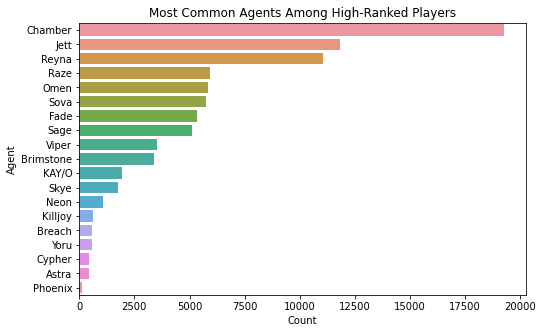

In [76]:
# Count top agents across Radiant/Immortal
plt.figure(figsize=(8,5))
sns.barplot(x=agent_counts.values, y = agent_counts.index)
plt.title("Most Common Agents Among High-Ranked Players")
plt.xlabel("Count")
plt.ylabel("Agent")
plt.show()

In [81]:
df.groupby('agent_1')['win_percent'].mean().sort_values(ascending=False)

# Sorting by agents with more then 10,000 selections
agent_counts = df['agent_1'].value_counts()
valid_agents = agent_counts[agent_counts > 10000].index
df_filtered = df[df['agent_1'].isin(valid_agents)]

# Filtering agent_1 by win percentage mean
df_filtered.groupby('agent_1')['win_percent'].mean().sort_values(ascending=False)

agent_1
Reyna      54.175677
Chamber    53.688659
Jett       53.163216
Name: win_percent, dtype: float64

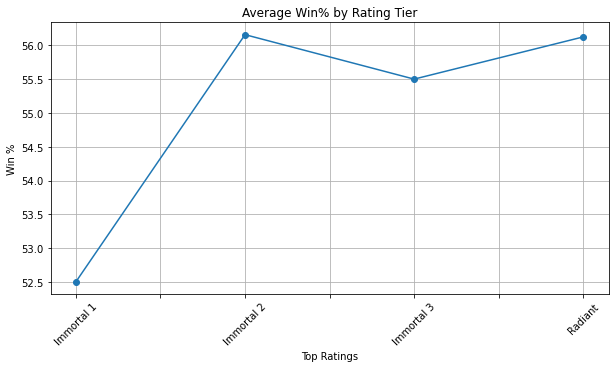

In [88]:
# Strip ratings into ordered categories
from pandas.api.types import CategoricalDtype

rating_order = ['Immortal 1','Immortal 2','Immortal 3','Radiant']

rating_cat = CategoricalDtype(categories=rating_order, ordered=True)
df['rating_cat'] = df['rating'].astype(rating_cat)

# Average win% by rating tier
df.groupby('rating_cat')['win_percent'].mean().plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average Win% by Rating Tier')
plt.ylabel('Win %')
plt.xlabel('Top Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Conclusion

Due to uneven sample sizes across ranks, especially outside Immortal and Radiant, the win percentage data should be interpreted cautiously.

In [86]:
# Checking overall number of players per region to determine what regions should be filtered.
df['region'].value_counts(dropna=False)

EU     32279
NA     20772
AP     19166
BR      6928
LAT     3270
KR      2292
Name: region, dtype: int64

In [87]:
# Filtering regions by those with more than 10,000 players
region_counts = df['region'].value_counts()
valid_region = region_counts[region_counts > 10000].index
df_filtered_region = df[df['region'].isin(valid_region)]

# Noting an artificial rating to tally scoring
rating_order = {
    'Bronze 1': 1, 'Bronze 2': 2, 'Bronze 3': 3,
    'Silver 1': 4, 'Silver 2': 5, 'Silver 3': 6,
    'Gold 1': 7, 'Gold 2': 8, 'Gold 3': 9,
    'Platinum 1': 10, 'Platinum 2': 11, 'Platinum 3': 12,
    'Diamond 1': 13, 'Diamond 2': 14, 'Diamond 3': 15,
    'Immortal 1': 16, 'Immortal 2': 17, 'Immortal 3': 18,
    'Radiant': 19
}
df_filtered_region['rating_score'] = df_filtered_region['rating'].map(rating_order)

# Drop NAs in rating_score
df_region = df_filtered_region[df_filtered_region['rating_score'].notna()]

# Average rating per region
df_region.groupby('region')['rating_score'].mean().sort_values(ascending=False)


region
NA    16.582948
AP    16.575074
EU    16.528907
Name: rating_score, dtype: float64

### EDA Conclusion

Throughout this exploratory analysis, we uncovered several patterns and limitations within the dataset:

* Agent Popularity: Chamber, Jett, and Reyna emerged as the most common agent picks among Immortal and Radiant players. This reflects current meta trends and highlights agent preferences at higher skill levels.
* Agent Win Rates: While we attempted to analyze win rate per agent, small sample sizes for some agents introduced bias. To reduce skew, we filtered by agents with over 1,000 picks—but even this can’t account for differences in map usage, team comp, or playstyle. We chose not to use win rate as a definitive ranking metric due to these limitations.
* Rating vs Win %: When analyzing win rates by rank, we noticed sharp outliers in lower tiers (e.g., Bronze, Silver). These were the result of extremely limited samples. Restricting the analysis to high ranks (Immortal 1+) produced a more stable view of performance distribution.
* Region vs Average Rank: Regional comparisons revealed that LAT and KR appeared to have higher average ratings, but this is largely due to smaller sample sizes skewing the mean. After filtering for regions with >10,000 players, NA and AP were more reliably comparable, though EU remained dominant in volume, slightly reducing interpretability.

### Limitations
* No access to exact MMR or RR scores, limiting the accuracy of true top-500 identification.
* Sample size imbalance across ranks and regions creates uneven interpretability.
* Some data appears misclassified (e.g., Unrated or Bronze players), likely due to incomplete scraping or submission errors.

### What Worked Well
* Data cleaning resolved major formatting issues (e.g., name#tag separation, NA misclassification).
* Agent popularity analysis and regional summaries were robust after filtering outliers.
* Clear insights emerged from focusing only on high-rank players and well-represented regions.